##### 【 ML - 꽃 품종 식별 모델 구현 】

- 주____제 : 3개 꽃 품종 식별 모델 구현으로 꽃가게 웹 서비스 
- 데이터셋
    * 파일명: Data/iris.csv
    * 피쳐들: **꽃받침 길이와 폭, 꽃잎 길이와 폭**
    * 타__겟: **꽃 종류**
- 학습_종류: **지도학습 -> 분류**
- 학습_방법: **KNN 최근접이웃알고리즘**

- 조____건  
    (1) 4개의 피쳐를 모두 사용한 모델  

sepal : 꽃받침
petal : 꽃잎

- sepal.length : 꽃받침 길이
- sepal.width  : 꽃받침 폭
- petal.length : 꽃잎  길이
- petal.width  : 꽃잎  폭

In [71]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML학습 알고리즘
from sklearn.neighbors import KNeighborsClassifier

In [72]:
## Cow 기능 활성화 : 데이터 변경시 복사 후 처리
if not pd.get_option('copy_on_write'):
    pd.options.mode.copy_on_write = True
    print(f"CoW : {pd.get_option('copy_on_write')}")

In [73]:
## 예시 데이터
df = pd.read_csv('../Data/iris.csv')
df_test = df.iloc[:, :4]
df_target = df.iloc[:, 4]

print(f'df_test : {df_test.ndim}D,  df_target : {df_target.ndim}D')

df_test : 2D,  df_target : 1D


In [74]:
pd.set_option('future.no_silent_downcasting', True)

In [75]:
print(f'df_test : {df_test.shape} / {df_test.ndim}D,  df_target : {df_target.shape} / {df_target.ndim}D')

df_test : (150, 4) / 2D,  df_target : (150,) / 1D


In [76]:
##- 모델 인스턴스 생성
kModel = KNeighborsClassifier()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
##- 학습 진행 : 학습용데이터(2D)와 타겟(1D)
##- KNN 학습 알고리즘은 메모리에 데이터와 타겟 로딩만 진행
kModel.fit(df_test, df_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [78]:
kModel.score(df_test, df_target)

0.9666666666666667

In [79]:
in_data = input("꽃받침 길이, 꽃받침 폭, 꽃잎 길이, 꽃잎 폭(예 5.1 3.5 1.4 .2) :").strip().split()
in_data = list(map(float, in_data))
new_data = pd.DataFrame([in_data] , columns=df.columns[:-1])

kModel.predict(new_data)

array(['Setosa'], dtype=object)

##### 【 ML - 꽃 품종 식별 모델 구현 】

- 주____제 : 3개 꽃 품종 식별 모델 구현으로 꽃가게 웹 서비스 
- 데이터셋
    * 파일명: Data/iris.csv
    * 피쳐들: **꽃받침 길이, 꽃잎 길이와 폭**
    * 타__겟: **꽃 종류**
- 학습_종류: **지도학습 -> 분류**
- 학습_방법: **KNN 최근접이웃알고리즘**

- 조____건  
    (2) 4개중 중요 피쳐만 사용한 모델

In [80]:
df.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [87]:
df['new'] = df.variety.astype('category').cat.codes

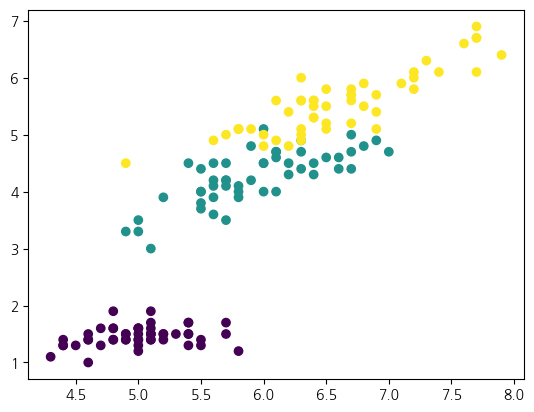

In [88]:
plt.scatter(df['sepal.length'], df['petal.length'], c = df['new'])

# 양의 상관계수를 보인다.

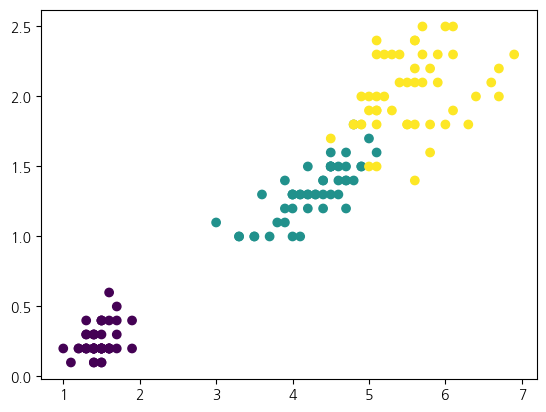

In [89]:
plt.scatter(df['petal.length'], df['petal.width'], c = df['new'])

# 양의 상관계수를 보인다.

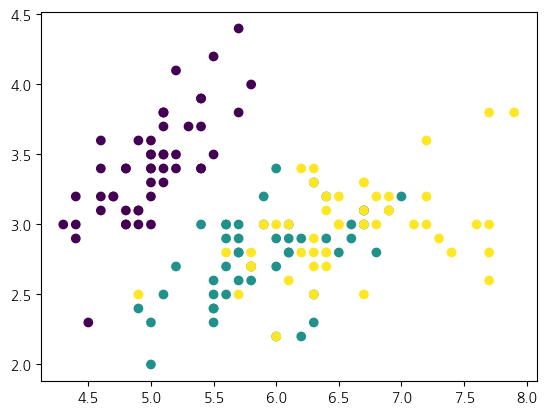

In [90]:
plt.scatter(df['sepal.length'], df['sepal.width'], c=df['new'])

# sepal width는 상관계수가 낮아서 산점도에서 상관관계를 보이지 않는다.

#### 상관관계 큰 (sepal.length, petal.length, petal.width) 피쳐만 사용

In [91]:
df_test = df.iloc[:, [0,2,3]]
df_target = df.iloc[:, 4]

print(f'df_test : {df_test.ndim}D,  df_target : {df_target.ndim}D')

df_test : 2D,  df_target : 1D


In [92]:
print(f'df_test : {df_test.shape} / {df_test.ndim}D,  df_target : {df_target.shape} / {df_target.ndim}D')

df_test : (150, 3) / 2D,  df_target : (150,) / 1D


In [93]:
##- 모델 인스턴스 생성
kModel = KNeighborsClassifier()
kModel

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [94]:
##- 학습 진행 : 학습용데이터(2D)와 타겟(1D)
##- KNN 학습 알고리즘은 메모리에 데이터와 타겟 로딩만 진행
kModel.fit(df_test, df_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [95]:
kModel.score(df_test, df_target)

0.9733333333333334

In [96]:
in_data = input("꽃받침 길이, 꽃잎 길이, 꽃잎 폭(예 5.1 1.4 .2) :").strip().split()
in_data = list(map(float, in_data))
new_data = pd.DataFrame([in_data] , columns=df.columns[[0, 2, 3]])

kModel.predict(new_data)

array(['Setosa'], dtype=object)